# import the essential libraries

In [1]:
! pip uninstall xlrd

Found existing installation: xlrd 1.1.0
Uninstalling xlrd-1.1.0:
  Would remove:
    /usr/local/bin/runxlrd.py
    /usr/local/lib/python3.7/dist-packages/xlrd-1.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xlrd/*
Proceed (y/n)? y
  Successfully uninstalled xlrd-1.1.0


In [2]:
! pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 5.5 MB/s 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import xlrd
%matplotlib inline

# load dataset

In [4]:
df = pd.read_excel('/content/default of credit card clients.xls')


In [5]:
df = pd.DataFrame(df.values[1:], columns=df.iloc[0])

# Explore data 

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,29669,29677,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,5,3,63,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,female,university,single,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [9]:
df.isna().sum()

0
ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     331
MARRIAGE                      323
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64

In [10]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: EDUCATION, dtype: int64

In [11]:
df['EDUCATION'] = df['EDUCATION'].str.replace('0','others')

In [12]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4916
others               124
Name: EDUCATION, dtype: int64

In [13]:
df['EDUCATION'].fillna(df['EDUCATION'].mode()[0],inplace=True)

In [14]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
0             54
Name: MARRIAGE, dtype: int64

In [15]:
df['MARRIAGE'] = df['MARRIAGE'].str.replace('0','single')

In [16]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
Name: MARRIAGE, dtype: int64

In [17]:
df['MARRIAGE'].fillna(df['MARRIAGE'].mode()[0],inplace=True)

In [18]:
df.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [19]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [20]:
df_cat = df[['SEX','EDUCATION','MARRIAGE']]
df_cat

,SEX,EDUCATION,MARRIAGE
0,female,university,married
1,female,university,single
2,female,university,single
3,female,university,married
4,male,university,married
...,...,...,...
29995,male,high school,married
29996,male,high school,single
29997,male,university,single
29998,male,high school,married


In [21]:
df.drop(['SEX','EDUCATION','MARRIAGE'],axis=1,inplace = True)

In [22]:
df = df.apply(lambda x : np.int32(x))

In [23]:
df

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,26,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,34,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,37,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,188948,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,43,-1,-1,-1,-1,0,0,1683,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,37,4,3,2,-1,0,0,3565,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,41,1,-1,0,0,0,-1,-1645,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
df = pd.concat([df_cat,df],axis=1)

In [25]:
df

,SEX,EDUCATION,MARRIAGE,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,female,university,married,1,20000,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,female,university,single,2,120000,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,female,university,single,3,90000,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,female,university,married,4,50000,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,male,university,married,5,50000,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,29996,220000,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,male,high school,single,29997,150000,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,male,university,single,29998,30000,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,male,high school,married,29999,80000,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [27]:
px.histogram(df.AGE)

In [28]:
px.box(df.AGE)

In [29]:
px.box(df['BILL_AMT1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



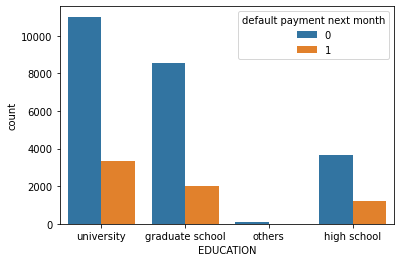

In [30]:
sns.countplot(df['EDUCATION'],hue = df['default payment next month']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



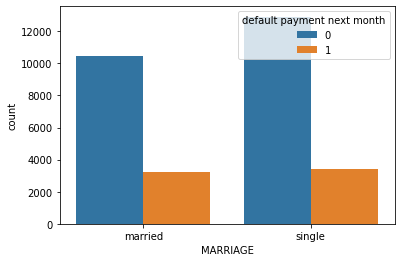

In [31]:
sns.countplot(df['MARRIAGE'],hue=df['default payment next month']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



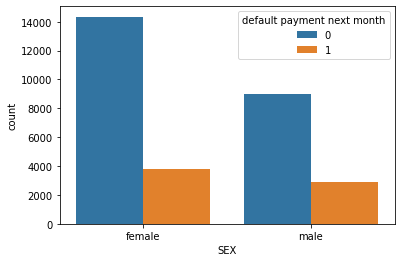

In [32]:
sns.countplot(df['SEX'],hue = df['default payment next month']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



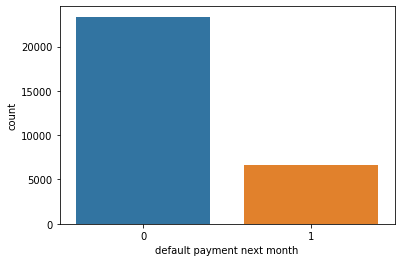

In [33]:
sns.countplot(df['default payment next month']);

As we see tht we deal with imbalance data

### now it`s time to handle outlier and handle imbalance data

In [34]:
! pip install datasist

In [35]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'ID', 'LIMIT_BAL', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [36]:
import datasist as ds
rows_outlier_presents = ds.structdata.detect_outliers(df, 0, ['AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
df.drop(rows_outlier_presents, inplace=True)

In [37]:
df['default payment next month'].value_counts()

0    14537
1     5045
Name: default payment next month, dtype: int64

In [38]:
#sns.pairplot(df,hue ='default payment next month')

In [39]:
df.drop('ID',axis = 1,inplace=True)

In [40]:
df = pd.get_dummies(df)

In [41]:
X = df.drop('default payment next month',axis = 1)
y = df['default payment next month']

In [42]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

### feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modeling

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [46]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      3599
           1       0.70      0.92      0.80      2216

    accuracy                           0.82      5815
   macro avg       0.82      0.84      0.82      5815
weighted avg       0.85      0.82      0.82      5815



In [47]:
from sklearn.metrics import classification_report
print(classification_report(lr.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     14184
           1       0.72      0.92      0.80      9075

    accuracy                           0.83     23259
   macro avg       0.83      0.84      0.82     23259
weighted avg       0.85      0.83      0.83     23259



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



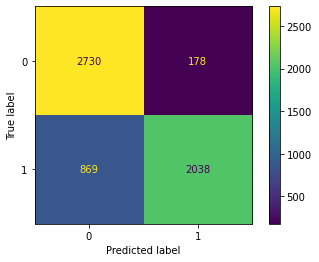

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



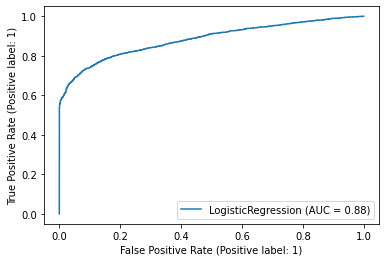

In [123]:
plot_roc_curve(lr, x_test, y_test)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [50]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2875
           1       0.78      0.77      0.78      2940

    accuracy                           0.78      5815
   macro avg       0.78      0.78      0.78      5815
weighted avg       0.78      0.78      0.78      5815



In [51]:
print(classification_report(dt.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11638
           1       1.00      1.00      1.00     11621

    accuracy                           1.00     23259
   macro avg       1.00      1.00      1.00     23259
weighted avg       1.00      1.00      1.00     23259



as we see above there is over fitting we will try some hyperparameter to prevent overfitting

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



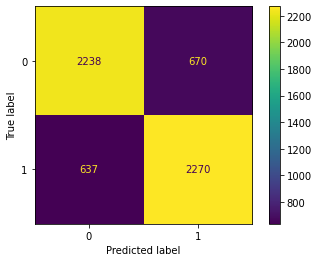

In [52]:
plot_confusion_matrix(dt, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



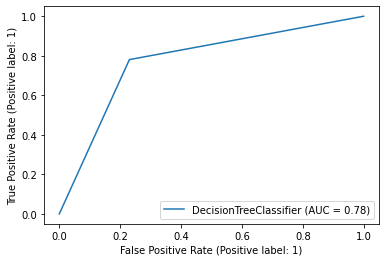

In [122]:
plot_roc_curve(dt, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



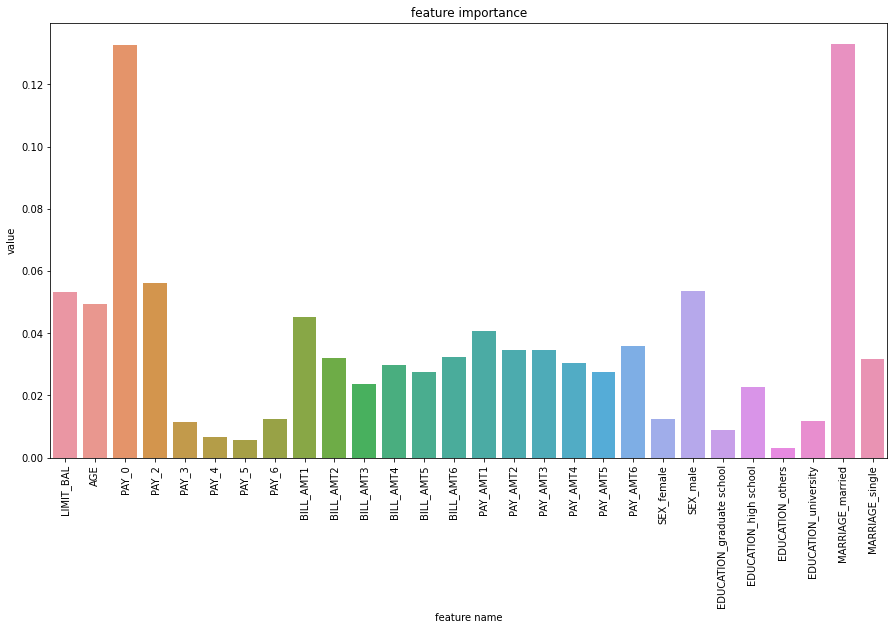

In [53]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
plt.title('feature importance')
plt.xlabel('feature name')
plt.ylabel('value')
sns.barplot(X.columns,dt.feature_importances_);


In [54]:
dt_hyper = DecisionTreeClassifier(max_depth = 5)
dt_hyper.fit(x_train,y_train)
y_pred_dt_hyper = dt_hyper.predict(x_test)

In [55]:
print(classification_report(dt_hyper.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     14253
           1       0.66      0.85      0.74      9006

    accuracy                           0.77     23259
   macro avg       0.77      0.79      0.77     23259
weighted avg       0.80      0.77      0.77     23259



In [56]:
print(classification_report(y_pred_dt_hyper,y_test))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3584
           1       0.65      0.85      0.74      2231

    accuracy                           0.77      5815
   macro avg       0.77      0.78      0.76      5815
weighted avg       0.79      0.77      0.77      5815



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



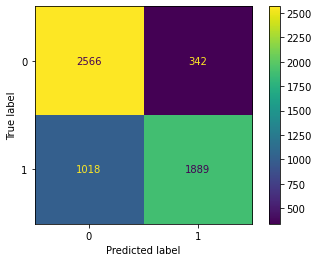

In [57]:
plot_confusion_matrix(dt_hyper, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



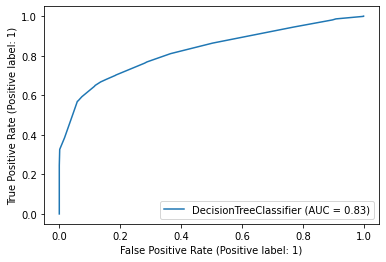

In [121]:
plot_roc_curve(dt_hyper, x_test, y_test)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)

In [59]:
print(classification_report(gb.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     13568
           1       0.76      0.91      0.83      9691

    accuracy                           0.84     23259
   macro avg       0.84      0.85      0.84     23259
weighted avg       0.86      0.84      0.84     23259



In [60]:
print(classification_report(y_pred_gb,y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3418
           1       0.75      0.91      0.82      2397

    accuracy                           0.84      5815
   macro avg       0.84      0.85      0.83      5815
weighted avg       0.85      0.84      0.84      5815



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



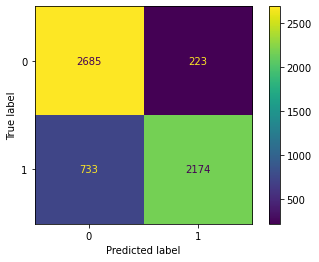

In [61]:
plot_confusion_matrix(gb, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



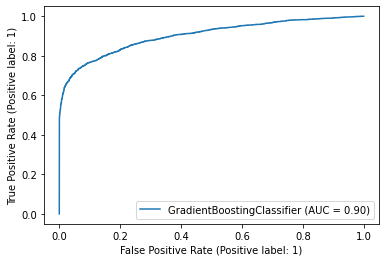

In [120]:
plot_roc_curve(gb, x_test, y_test)

## hyper parameter tuning on xgboost using grid search

In [62]:
parameter = {'learning_rate':[0.01,0.001,0.1],
             'n_estimators':[100,500,1000],
             'max_depth' :[3,5,9]
               }

In [63]:
from sklearn.model_selection import GridSearchCV
gb_hyper = GradientBoostingClassifier()
gs =GridSearchCV(gb_hyper,parameter,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.001, 0.1],
                         'max_depth': [3, 5, 9],
                         'n_estimators': [100, 500, 1000]})

In [64]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}

In [72]:
gb_tuned = GradientBoostingClassifier(learning_rate=0.1 ,n_estimators=1000 ,max_depth=9 )
gb_tuned.fit(x_train,y_train)
y_pred_gb_tuned = gb_tuned.predict(x_test)

In [73]:
print(classification_report(y_pred_gb_tuned,y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3177
           1       0.80      0.88      0.84      2638

    accuracy                           0.84      5815
   macro avg       0.84      0.85      0.84      5815
weighted avg       0.85      0.84      0.84      5815



In [74]:
print(classification_report(gb_tuned.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11632
           1       1.00      1.00      1.00     11627

    accuracy                           1.00     23259
   macro avg       1.00      1.00      1.00     23259
weighted avg       1.00      1.00      1.00     23259



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



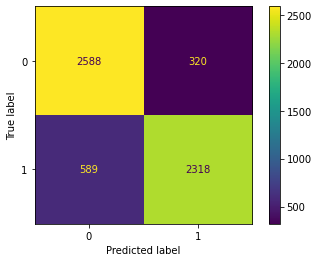

In [75]:
plot_confusion_matrix(gb_tuned, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



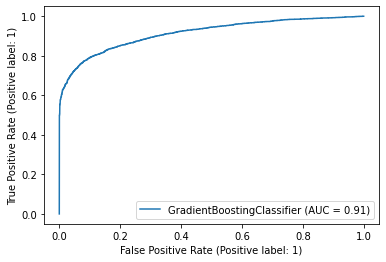

In [119]:
plot_roc_curve(gb_tuned, x_test, y_test)

Apply PCA

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=10)
x_train_pca_10 = pca.fit_transform(x_train)
x_test_pca_10 = pca.transform(x_test)

In [78]:
gb_pca_10 = GradientBoostingClassifier()
gb_pca_10.fit(x_train_pca_10,y_train)
y_pred_gb_pca_10 = gb_pca_10.predict(x_test_pca_10)

In [79]:
print(classification_report(y_pred_gb_pca_10,y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      3343
           1       0.73      0.86      0.79      2472

    accuracy                           0.81      5815
   macro avg       0.81      0.81      0.81      5815
weighted avg       0.82      0.81      0.81      5815



In [81]:
print(classification_report(gb_pca_10.predict(x_train_pca_10),y_train))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     13295
           1       0.75      0.87      0.80      9964

    accuracy                           0.82     23259
   macro avg       0.82      0.83      0.82     23259
weighted avg       0.83      0.82      0.82     23259



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



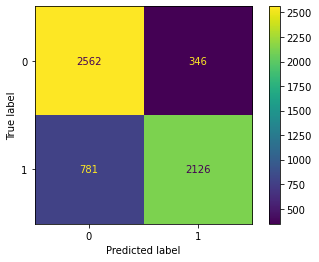

In [82]:
plot_confusion_matrix(gb_pca_10, x_test_pca_10, y_test)

## Apply PCA with two components

In [83]:
pca = PCA(n_components=2)
x_train_pca_2 = pca.fit_transform(x_train)
x_test_pca_2 = pca.transform(x_test)

In [84]:
df_train_2 = pd.DataFrame(data = x_train_pca_2, columns = ['PCA' + str(i+1) for i in range(2)])
df_train_2['target'] = y_train

In [85]:
fig = px.scatter(df_train_2, x="PCA1", y="PCA2", color="target")
fig.show()

In [105]:
# as we see above the data is not linear separated so we can use sve with non linear kernal
from sklearn.svm import SVC
sv = SVC(kernel='rbf')
sv.fit(x_train_pca_2,y_train)
y_pred_sv = sv.predict(x_test_pca_2)

In [106]:
print(classification_report(y_pred_sv,y_test))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      3177
           1       0.64      0.70      0.67      2638

    accuracy                           0.69      5815
   macro avg       0.69      0.69      0.69      5815
weighted avg       0.69      0.69      0.69      5815



In [107]:
print(classification_report(sv.predict(x_train_pca_2),y_train))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70     12562
           1       0.65      0.71      0.68     10697

    accuracy                           0.69     23259
   macro avg       0.69      0.69      0.69     23259
weighted avg       0.69      0.69      0.69     23259



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



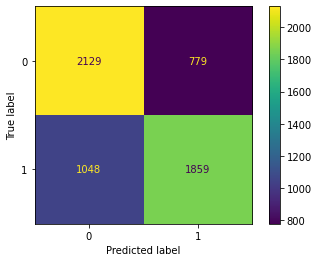

In [108]:
plot_confusion_matrix(sv, x_test_pca_2, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



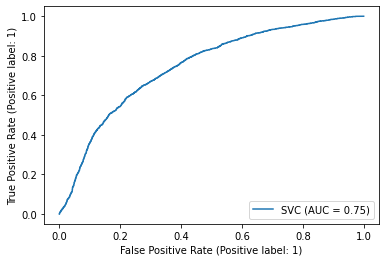

In [116]:
plot_roc_curve(sv, x_test_pca_2, y_test)

In [109]:
sv_poly = SVC(kernel='poly')
sv_poly.fit(x_train_pca_2,y_train)
y_pred_sv_poly = sv_poly.predict(x_test_pca_2)

In [110]:
print(classification_report(y_pred_sv_poly,y_test))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      3423
           1       0.58      0.70      0.63      2392

    accuracy                           0.67      5815
   macro avg       0.67      0.67      0.66      5815
weighted avg       0.68      0.67      0.67      5815



In [111]:
print(classification_report(sv_poly.predict(x_train_pca_2),y_train))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69     13778
           1       0.57      0.70      0.63      9481

    accuracy                           0.66     23259
   macro avg       0.66      0.67      0.66     23259
weighted avg       0.68      0.66      0.66     23259



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



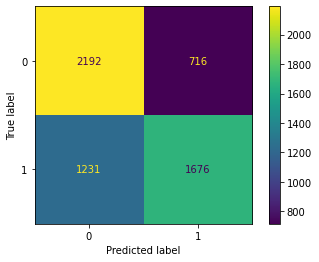

In [112]:
plot_confusion_matrix(sv_poly, x_test_pca_2, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



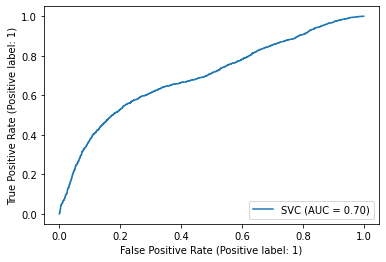

In [115]:
plot_roc_curve(sv_poly, x_test_pca_2, y_test)

In [86]:
gb_pca_2 = GradientBoostingClassifier()
gb_pca_2.fit(x_train_pca_2,y_train)
y_pred_gb_pca_2 = gb_pca_2.predict(x_test_pca_2)

In [92]:
print(classification_report(y_pred_gb_pca_2,y_test))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      3065
           1       0.66      0.70      0.68      2750

    accuracy                           0.69      5815
   macro avg       0.69      0.69      0.69      5815
weighted avg       0.69      0.69      0.69      5815



In [93]:
print(classification_report(gb_pca_2.predict(x_train_pca_2),y_train))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     12163
           1       0.68      0.71      0.70     11096

    accuracy                           0.70     23259
   macro avg       0.70      0.70      0.70     23259
weighted avg       0.70      0.70      0.70     23259



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



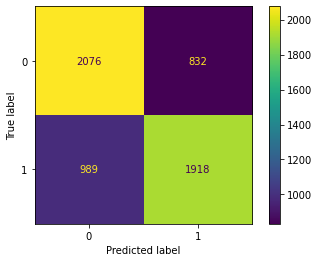

In [95]:
plot_confusion_matrix(gb_pca_2, x_test_pca_2, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



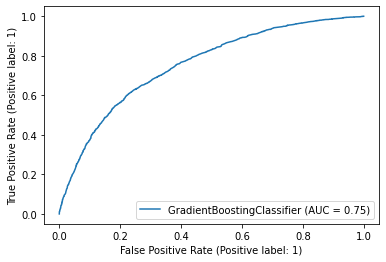

In [114]:
plot_roc_curve(gb_pca_2, x_test_pca_2, y_test)

## Apply PCA with 0.9 Variance 

In [98]:
pca = PCA(n_components=0.9)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [99]:
pca.n_components_

15

In [100]:
gb_pca = GradientBoostingClassifier()
gb_pca.fit(x_train_pca,y_train)
y_pred_gb_pca = gb_pca.predict(x_test_pca)

In [101]:
print(classification_report(y_pred_gb_pca,y_test))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      3361
           1       0.73      0.86      0.79      2454

    accuracy                           0.81      5815
   macro avg       0.81      0.81      0.80      5815
weighted avg       0.82      0.81      0.81      5815



In [102]:
print(classification_report(gb_pca.predict(x_train_pca),y_train))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     13314
           1       0.75      0.87      0.80      9945

    accuracy                           0.82     23259
   macro avg       0.82      0.83      0.82     23259
weighted avg       0.83      0.82      0.82     23259



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



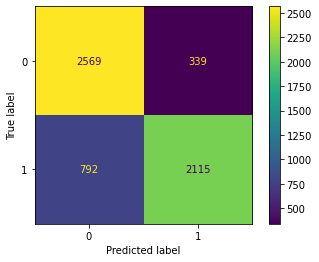

In [103]:
plot_confusion_matrix(gb_pca, x_test_pca, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



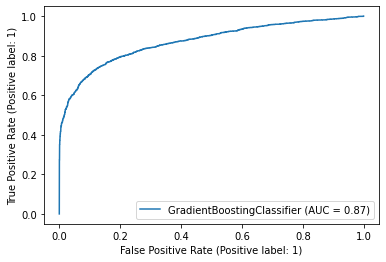

In [113]:
plot_roc_curve(gb_pca, x_test_pca, y_test)